In [12]:
# Enable the interactive plot in Jupyter Notebook
#%matplotlib inline

%matplotlib widget



import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np


## this is for now taking the data from the txt file and getting it loaded into an array of boxes 

# generic box class to store values
class box:
    def __init__(self):
        self.X = []
        self.Y = []
        self.Z = []
    def p(self):
        print()
        print("Box Values: ")
        print(self.X)
        print(self.Y)
        print(self.Z)
        print()

        
testBox = box()

# keeping list of boxes to eventually plot
listOfBoxes = []

counter = 0

#keeping track of previous line to see which interval to append floats to from the txt file
prevLine = ""


with open('/Users/sohumbelagode/Desktop/Yap- Research/initialProject.txt', 'r') as file:
    
    for line in file:
        counter += 1
        
        
        if "Box" in line:
            listOfBoxes.append(box())
            appendedBox = listOfBoxes[-1]
            
            
            
            
        if "X" in prevLine:
            ## get comma sperated values
            commaSeperatedLine = line.split(",")
            appendedBox.X.append(float(commaSeperatedLine[0][1:]))
            appendedBox.X.append(float(commaSeperatedLine[1][:-2]))
        elif "Y" in prevLine:
            ## get comma sperated values
            commaSeperatedLine = line.split(",")
            appendedBox.Y.append(float(commaSeperatedLine[0][1:]))
            appendedBox.Y.append(float(commaSeperatedLine[1][:-2]))
        elif "Z" in prevLine:
            ## get comma sperated values
            commaSeperatedLine = line.split(",")
            appendedBox.Z.append(float(commaSeperatedLine[0][1:]))
            appendedBox.Z.append(float(commaSeperatedLine[1][:-2]))

        prevLine = line     
        
            
        
        #print(line, end='')
        
listOfBoxes = listOfBoxes[:-1]
print(len(listOfBoxes))





572


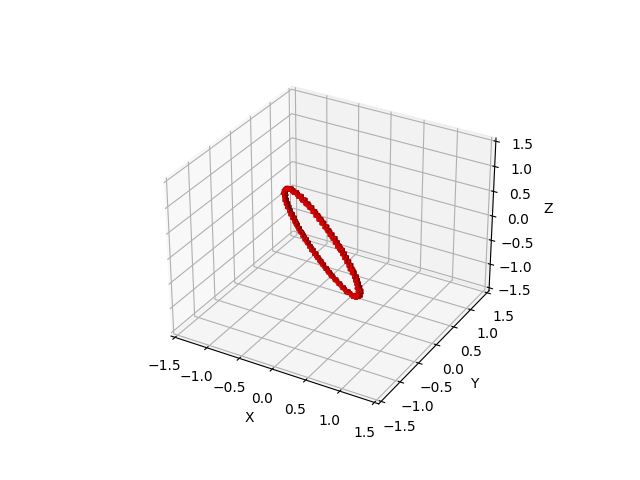

In [13]:

def plotCube(ax, x1, x2, y1, y2, z1, z2):
    
    x_center = (x1 + x2) / 2
    y_center = (y1 + y2) / 2
    z_center = (z1 + z2) / 2
    dx = x2 - x1
    dy = y2 - y1
    dz = z2 - z1

    # Use ax.bar3d to plot the box
    ax.bar3d(x_center, y_center, z_center, dx, dy, dz, color='red', alpha=1)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# limits of cube

ax.set_xlim([-1.5, 1.5])
ax.set_ylim([-1.5, 1.5])
ax.set_zlim([-1.5, 1.5])

# Set labels
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')


#looping through boxes and plotting them: 
counter = 0
for intervalBox in listOfBoxes:
    counter += 1
    # if counter > 1000:
    #     break
    plotCube(ax, intervalBox.X[0], intervalBox.X[1], intervalBox.Y[0], intervalBox.Y[1], intervalBox.Z[0], intervalBox.Z[1])
    




plt.show()


In [14]:
import plotly.graph_objects as go
fig = go.Figure(data=[
    go.Mesh3d(
        # 8 vertices of a cube
        x=[0, 0, 1, 1, 0, 0, 1, 1],
        y=[0, 1, 1, 0, 0, 1, 1, 0],
        z=[0, 0, 0, 0, 1, 1, 1, 1],
        
        # Intensity of each vertex, which will be interpolated and color-coded
        color="red",
        # i, j and k give the vertices of triangles
        i = [7, 0, 0, 0, 4, 4, 6, 6, 4, 0, 3, 2],
        j = [3, 4, 1, 2, 5, 6, 5, 2, 0, 1, 6, 3],
        k = [0, 7, 2, 3, 6, 7, 1, 1, 5, 5, 7, 6],
        name='y',
        showscale=False
    )
])

fig.show()